<a href="https://colab.research.google.com/github/bluebynick/CEE-9730-Data-Science-for-Geotechnical-Engineers/blob/Assignments/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hello world
QU1: There are 1072 soils that are are associated with a Su from any test.


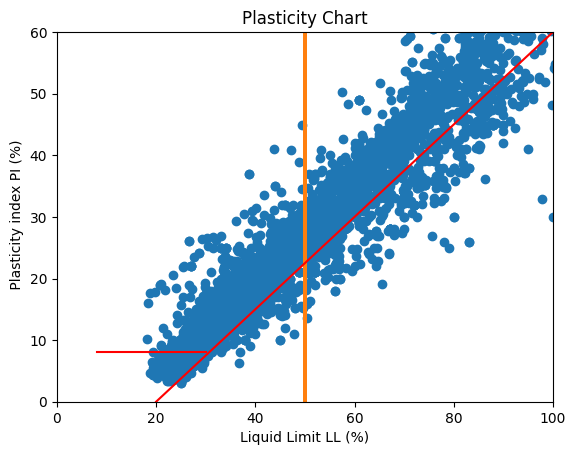

In [252]:
from re import X
from typing import Counter
import pandas as pd

print('hello world');

readFile = pd.read_csv("CLAY_10_7490_TC304.csv"); ## from tut 3
readFile
#readFile.info()

# LOL ok. forget using tut 3 content. use it as learning

# question 1. how many soils are described in the database

#print('The number of soils described is ' + str(readFile.shape[0]));

# question 1. how many are associated with a Su from any test
x = []; # declare array size of csv
counter =0;

for i in range(readFile.shape[0]): # for loop going through each row
  x.append(i);
  for z in range(readFile.shape[1]): # for loop going through each column
    if(z>=19): #the rows that are for the su tests are 19-40
      if(readFile.iat[i,z] >= 0): #if the value of the csv at row i and column z is numeiric
        counter +=1; #increase the count
        x[i] = i;
        break; #break now so u dont repeat the same soil
      else:
        x[i] = 0; #if its not mnumeric, make the column value 0
        break;

#for i in x:
#  if(x[i] >0): #if the column value wasn't changed to 0 from 3 lines up
#    print(str(x[i]));

print('QU1: There are '+ str(counter) + ' soils that are are associated with a Su from any test.');# And they are listed above.')

#question 2
#readFile.info()
import matplotlib.pyplot as plt
plt.scatter(pd.to_numeric(readFile[readFile.columns[8]], errors ='coerce'),pd.to_numeric(readFile[readFile.columns[10]], errors ='coerce'));
#what an insane line of code
#so scatter() takes two numeric arrays
#i'm using .columns to get the column name (b/c i dont have them i have to get them with .columns)
#then i'm giving that to be read by readFile
#then i'm parseing that and catching the errors
#twice. wild
plt.xlim(0,100);
plt.ylim(0,60);
plt.xscale('linear');
plt.title("Plasticity Chart");
plt.xlabel("Liquid Limit LL (%)");
plt.ylabel(" Plasticity index PI (%)");
plt.bar(50,60);
plt.plot([20,100], plt.ylim(), ls="-", c="red");
plt.plot([30,8], [8,8], ls="-", c="red");

xbig50 = readFile.loc[pd.to_numeric(readFile[readFile.columns[8]], errors ='coerce')>50,:]
CH = xbig50.loc[pd.to_numeric(xbig50[xbig50.columns[10]], errors ='coerce')>(0.73*(pd.to_numeric(xbig50[xbig50.columns[10]]))-20),:]
MHOH = xbig50.loc[pd.to_numeric(xbig50[xbig50.columns[10]], errors ='coerce')<(0.73*(pd.to_numeric(xbig50[xbig50.columns[10]]))-20),:]

xless50 = readFile.loc[pd.to_numeric(readFile[readFile.columns[8]], errors ='coerce')<50,:]
CL = xless50.loc[pd.to_numeric(xless50[xless50.columns[10]], errors ='coerce')>(0.73*(pd.to_numeric(xless50[xless50.columns[10]]))-20),:]
ML = xless50.loc[pd.to_numeric(xless50[xless50.columns[10]], errors ='coerce')<(0.73*(pd.to_numeric(xless50[xless50.columns[10]]))-20),:]

xlessline = readFile.loc[pd.to_numeric(readFile[readFile.columns[8]], errors ='coerce')<(0.73*(pd.to_numeric(readFile[readFile.columns[10]]))-20),:]
CLML = xlessline.loc[pd.to_numeric(readFile[readFile.columns[10]], errors ='coerce')<8,:]